In [201]:
# 설치한 폰트 설정 저 파일 위치의 폰트들을 확인해서 긁어옴.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline

# Add every font at the specified location
font_dir = ['C:\\Chang_git\\python_basic\\fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'LINE Seed Sans KR'
print(mpl.rcParams['font.family'])
mpl.rcParams['axes.unicode_minus'] = False

Dongle
Dongle
Dongle
LINE Seed Sans KR
NanumGothic
['LINE Seed Sans KR']


In [202]:
import seaborn as sns
sns.set_theme(style = 'whitegrid')
sns.set_context('paper')

### displot() hue로 subset 나누기
- hue 키워드 인수를 통해 subset을 구분하고 이를 각각의 그래프로 표현할 수 있습니다.
- 아래는 hue 값으로 species(펭귄의 종)에 대해 설정해서 각각 species별로 그래프를 만들었습니다.

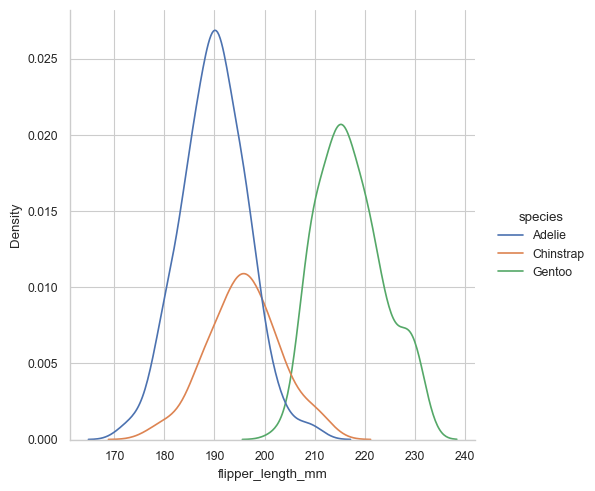

In [203]:
penguins = sns.load_dataset('penguins')
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', kind= 'kde')

### displot() col로 그래프 나누기
- col 키워드 인수를 활용해서 subset을 한번 더 분류할 수 있다.
- col에 sex column label을 설정하여 subseet을 이전 예제보다 더 나눴다.

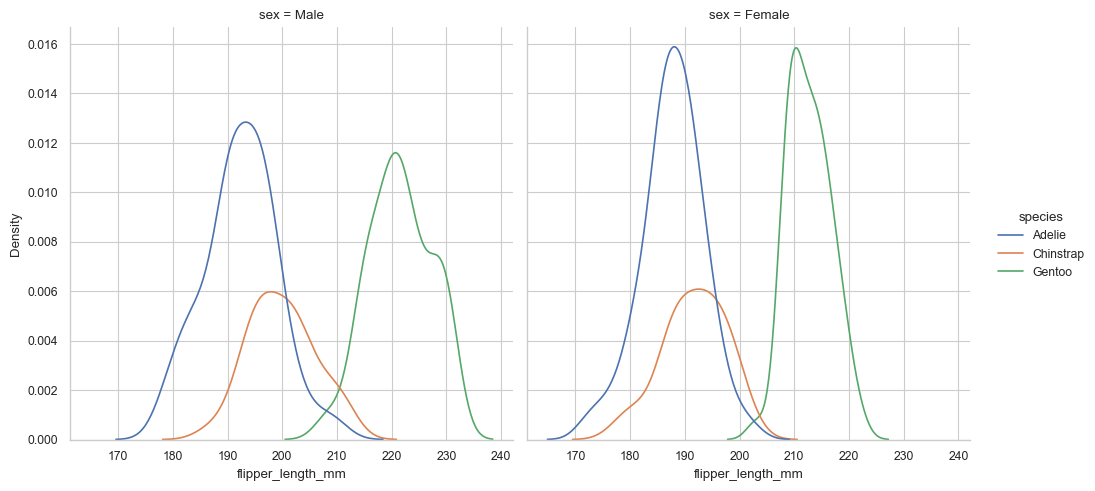

In [204]:
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', col = 'sex', kind= 'kde')

### displot() 그래프 크기 설정
- height 와 aspect를 활용해서 그래프 크기를 제어할 수 있다.
- height는 inches단위이며 aspect는 height와 aspect 값을 곱해서 얻는다
- 높이 대비 너비 비율을 지정한다고 이해하면 된다.

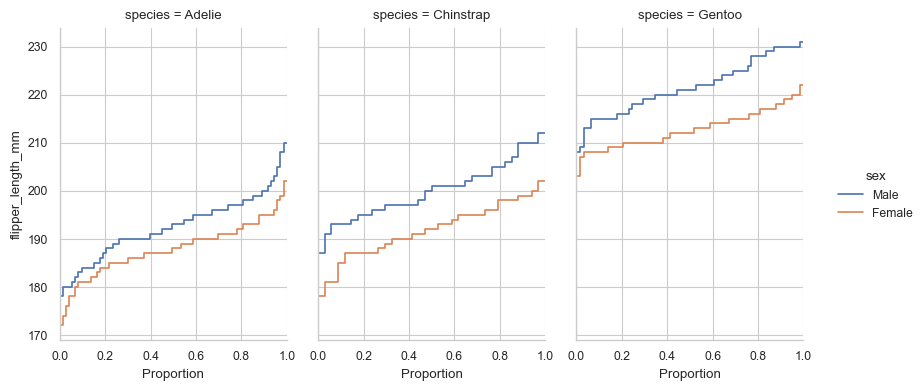

In [205]:
sns.displot(
    data = penguins, y = 'flipper_length_mm',hue = 'sex', col = 'species', kind = 'ecdf', height = 4, aspect= .7
)

### displot() col로 그래프 나눈 axis label, title 지정
- 각 axis label과 title도 지정해줄 수 있다.
- axis label은 set_axis_labels(xlabel,ylabel) 메서드를, title은 set_titles()을 활용하는데,
- formatting keys인 {col_var}와 {col_name}을 조합해서 포매팅 할 수 있다.

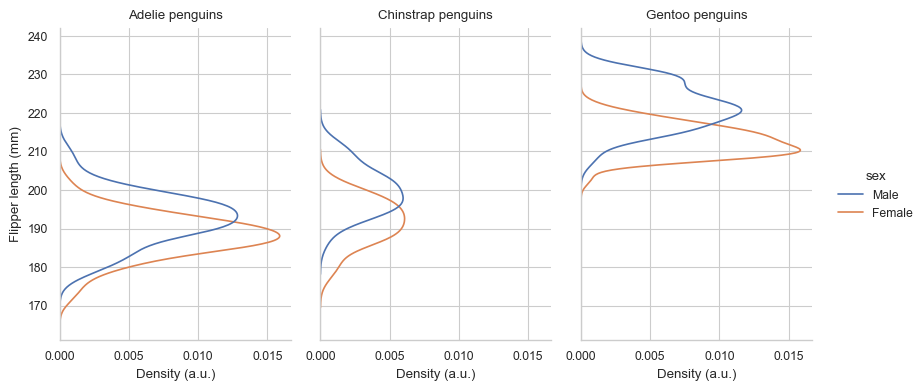

In [206]:
g = sns.displot(
    data = penguins, y = 'flipper_length_mm',hue = 'sex', col = 'species', kind = 'kde', height = 4, aspect= .7
)
g.set_axis_labels('Density (a.u.)','Flipper length (mm)')
g.set_titles('{col_name} penguins')

### barplot()
- x와 hue를 카테고리화 해서 body_mass_g 값의 평균과 신뢰구간(error bar)을 구해서 바 플롯으로 표현한다.
- 각 사각형의 길이로 편차를 에러바로 자동으로 표현한다.

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

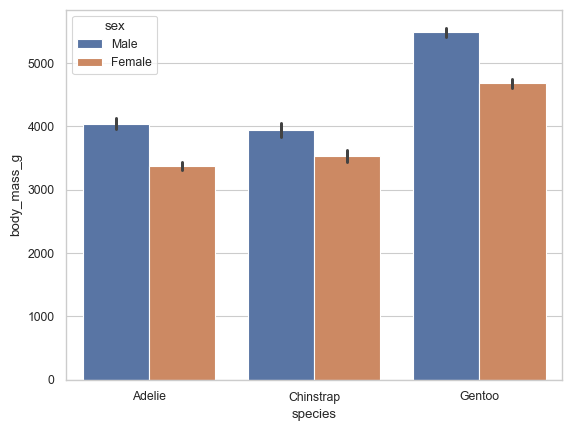

In [207]:
sns.barplot(data = penguins, x = 'species',y='body_mass_g',hue = 'sex')

# boxplot() = Box-Whisker plot
- 박스와 바깥의 선(whisker)
- 박스는 실수 값 분포에서 1사분위수와 3사분위수를 뜻한다.
- Q3- Q1 을 IQR(interquartile range)라고 한다.
- 박스 내부의 가로선은 중앙값을 나타낸다.
- 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR만큼 높은 값의 구간을 기준으로  
  그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이.
- 그 바깥의 점은 outlier라고 부르는데 일일히 점으로 표시한다.  
```python 
df = sns.load_dataset('titanic')
sns.boxplot(x = df['age'])
```
- 위 코드의 실행 결과임  
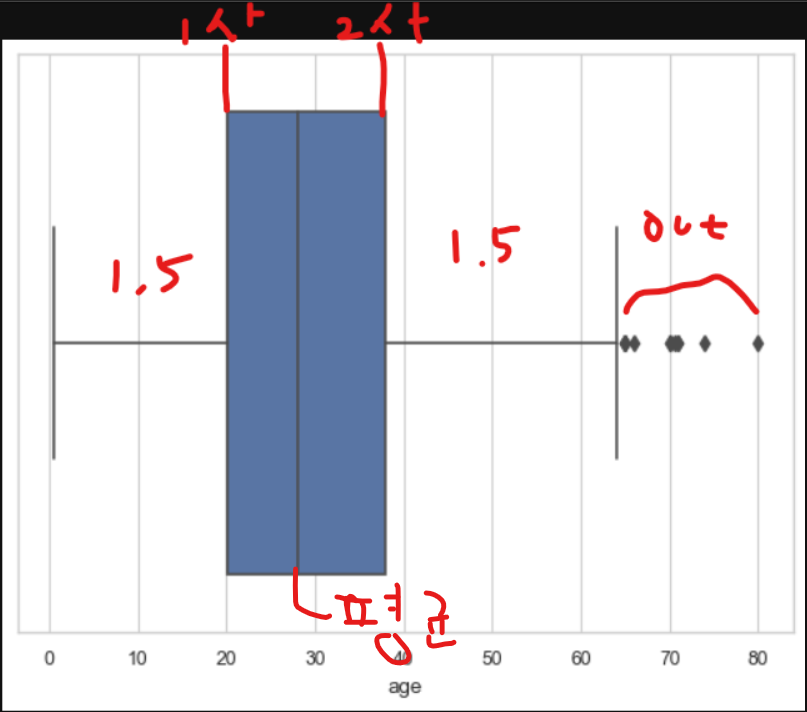

- 카테고리화 된 column을 하나의 분류값으로 추가하기 위해 y 키워드 인수로 설정하니
- y축을 기준으로 카테고리별 box plot을 unique한 value의 개수만큼 나눠서 얻을 수 있었다.

<AxesSubplot:xlabel='age', ylabel='class'>

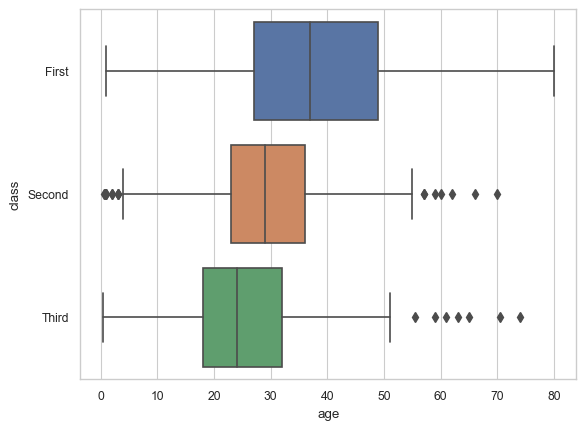

In [208]:
df = sns.load_dataset('titanic')
sns.boxplot(data = df,x = 'age', y = 'class') # x축은 수치를 나타내고 y축은 카테고리로 나타낸다.(class의 dtype이 카테고리이기 때문)

- y와 hue에 전달된 column을 기준으로 그룹화한 결과를 박스플롯으로 그린다

<AxesSubplot:xlabel='age', ylabel='class'>

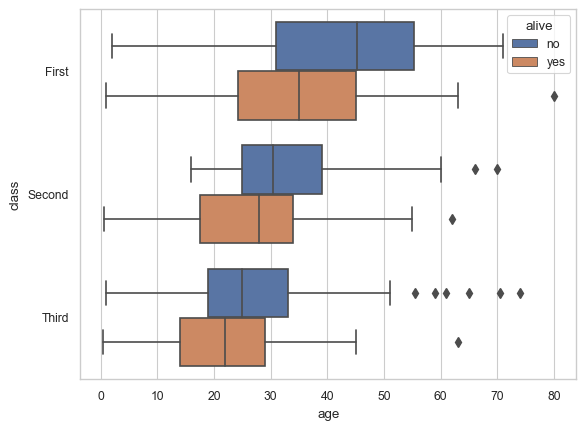

In [209]:
sns.boxplot(data = df,x = 'age', y = 'class',hue = 'alive')

- box plot을 그렸는데 여러개로 출력된 그래프의 순서가 마음에 들지 않을 떄
- order 키워드 인수를 사용하여 순서를 집접 리스트형태로 전달가능하다.

<AxesSubplot:xlabel='age', ylabel='alive'>

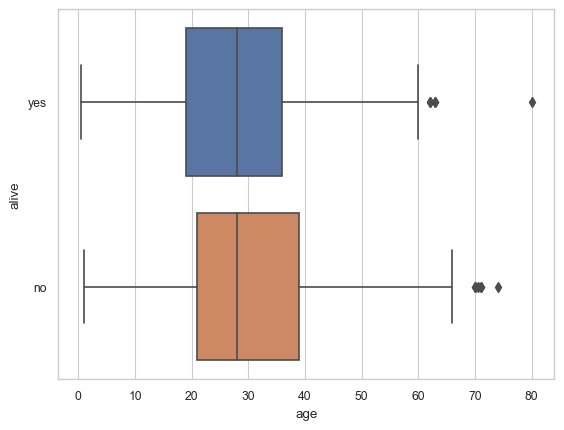

In [210]:
sns.boxplot(data = df,x = 'age', y = 'alive',order = ['yes','no'])

- 수치 값을 갖는 column 여럿을 동시에 하나의 box plot에 표현할 수 있다.
- data 키워드 인수로 DataFrame을 전달할 때 그래프로 표현하고 싶은 수치값을 갖는 column들을 인덱싱해서 DataFrame 형태로 전달하면 된다.
- orient 키워드 인수에 h(수평), v(수직) 값을 줘서 box_plot 의 방향을 바꿀 수 있다.(x,y 값을 넣지 않은 예제라서 방향 지정이 필요했음.)

<AxesSubplot:>

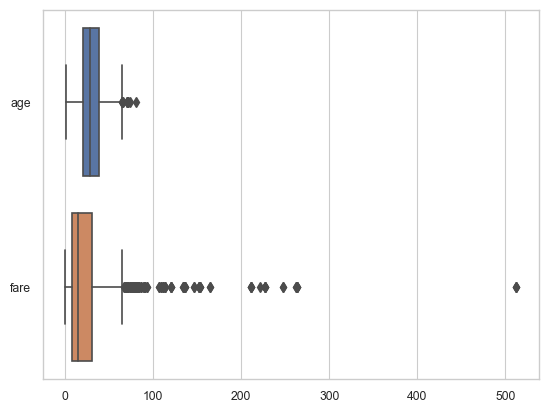

In [211]:
sns.boxplot(data = df[['age','fare']],orient ='h')

# Violinplot()
- box plot과 kde의 혼합한 그래프 생김새가 violin같음
- 세로 방향으로 kde의 모양을 그리며 좌우 대칭되게 그려진다.
- 사요ㅗㅇ 방식은 box plot가 유사하다.
- 하나 이상의 카테고리 column을 가지고 데이터의 분포를 나란히 그린다. 그래서 그래프들의 분포를 비교하기에 적합함.

<AxesSubplot:xlabel='age'>

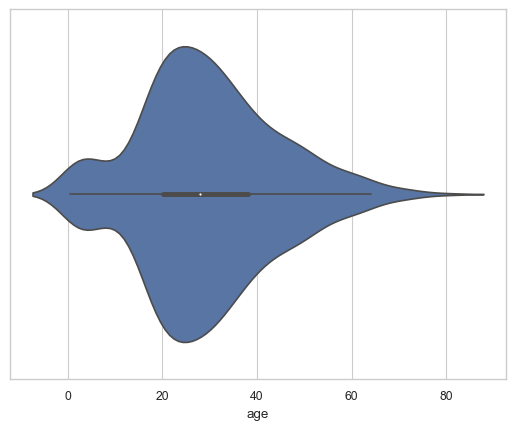

In [212]:
sns.violinplot(x = df['age'])

- 카테고리 Dtype을 갖는 class column을 활용하여 y축의 값으로 설정했다.
- 그렇게 하면 카테고리마다 갖는 데이터 분포를 y축을 기준으로 하여 분리해서 그릴 수 있다.

<AxesSubplot:xlabel='age', ylabel='class'>

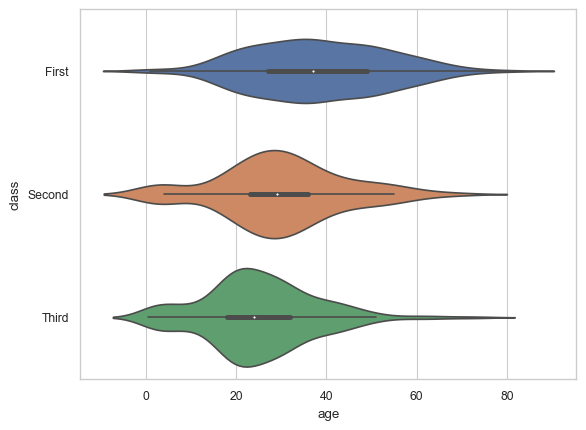

In [213]:
sns.violinplot(data = df , x = 'age',y = 'class') 

- x 키워드 인수에 카테고리 자료형을 설정했다.
- 이에 따라 violin plot의 방향이 vertical하게 변경된 것을 확인할 수 있다.

<AxesSubplot:xlabel='class', ylabel='age'>

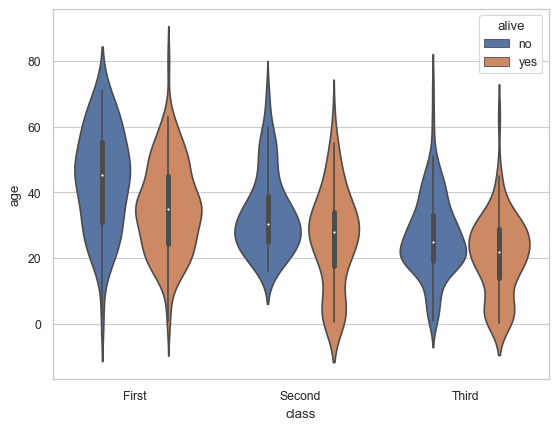

In [214]:
sns.violinplot(data= df, x = 'class',y = 'age', hue = 'alive')

- violin의 그래프가 hue에 설정한 alive colum에 따라 좌,우측의 각각 분포를 그려내고 있다.
- split 키워드 인수에 True값을 전달하면(단 hue의 인자로 전달되는 column의 unique값이(level이) 2개여야만 가능함)
- hue의 level이 2개가 아니라면 ValueError가 발생한다.

<AxesSubplot:xlabel='deck', ylabel='age'>

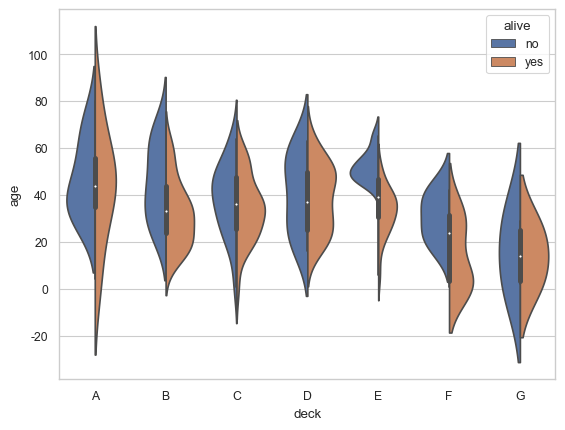

In [215]:
sns.violinplot(data = df, x = 'deck', y = 'age', hue = 'alive', split = True)

### violin plot 표현시 범위 제한
- 타이타닉 데이터셋의 age의 경우 0 미만의 범위에 그래프가 포함되어선 안된다.
- 값의 표현 범위를 명확히 하기 위해서 cut이라는 키워드 인수를 사용할 수 있다.

<AxesSubplot:xlabel='age', ylabel='alive'>

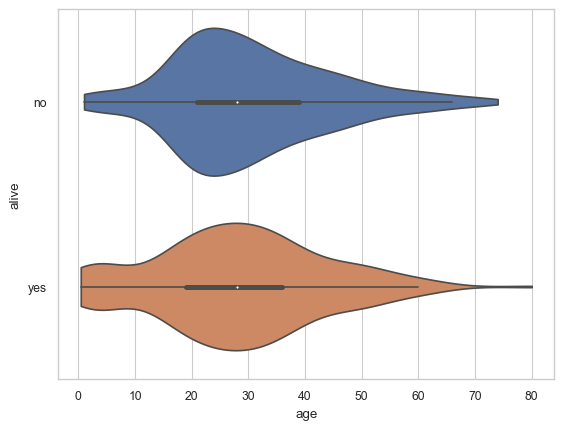

In [216]:
sns.violinplot(data = df  , x = 'age', y= 'alive',cut= 0)

- kde 의 그래프 모양을 부드럽게 처리하다보면 대역폭의 크기가 커진다.
- 이를 줄이기 위해서 bw(bandwidth) 키워드 인수에 소수 값을 갖는 비율을 설정해줄 수 있다.(그래프의 부드러운정도를 줄인다)

<AxesSubplot:xlabel='age', ylabel='alive'>

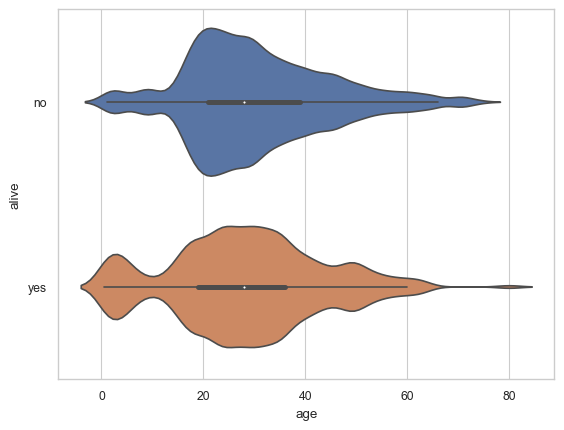

In [217]:
sns.violinplot(data = df  , x = 'age', y= 'alive',bw=.15)

- violin plot 값들의 분포정도를 보일 수 있다.
- inner 키워드 인수에 stick이란 값을 전달하면 된다

<AxesSubplot:xlabel='age', ylabel='embark_town'>

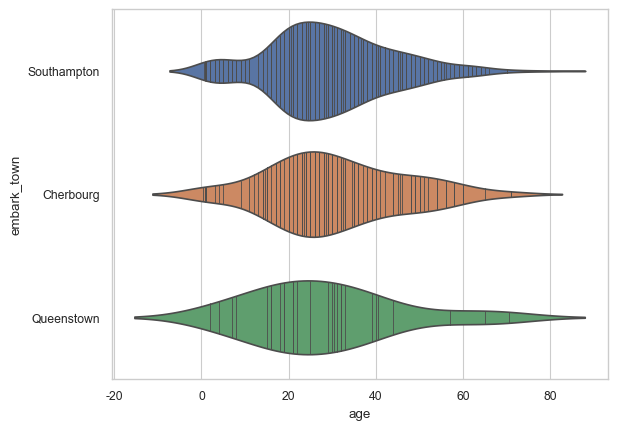

In [218]:
sns.violinplot(data = df , x = 'age', y= 'embark_town', inner = 'stick')

- scale에 따라 그래프의 크기가 달라진다.
- scale은 총 area , count, width의 값을 지정할 수 있으며 기본 값은 area이다
- area는 violin의 영역 너비가 같게 그려진다.
- count는 실제 갖는 데이터 개수에 따라 violin의 크기가 달라진다.
- width는 violin이 동일한 폭을 갖게 된다.

<AxesSubplot:xlabel='age', ylabel='embark_town'>

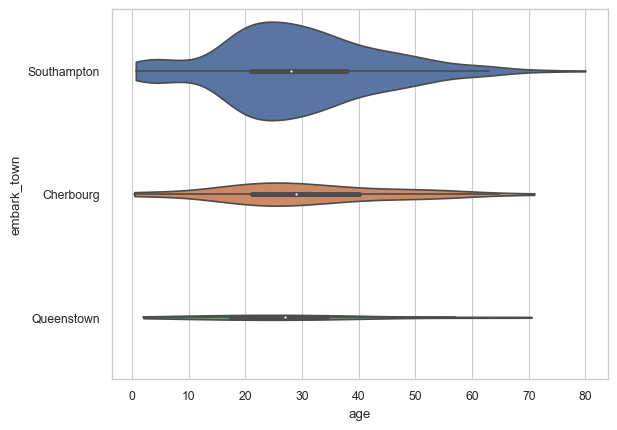

In [219]:
sns.violinplot(data = df , x = 'age', y= 'embark_town',scale = 'count',cut = 0)

# strip plot()
- 카테고리마다의 scater plot을 그린다.
- 그리는 방식으로는 jitter를 사용하는데 이 방식은 다른 축의 방향으로 랜덤하게 점을 찍어 겹치는 부분을 줄인다.
- 이 방식은 box plot과 violin plot의 보완이 될 수 있다.
- 단 하나의 숫자형 column을 할당한 경우에는 각 점들이 다른 축의 방향으로 랜덤하게 jitteed된 단일 변량에 대한 분포의 형태를 보여준다.

<AxesSubplot:xlabel='total_bill'>

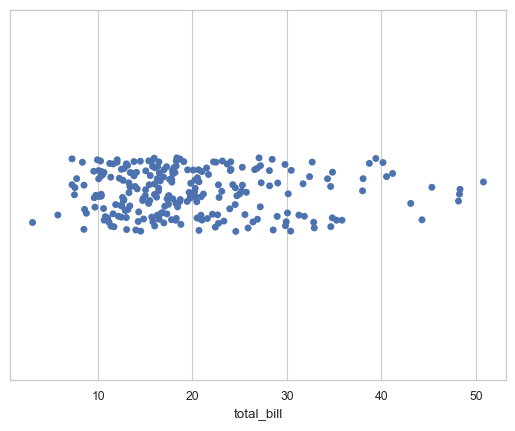

In [220]:
tips = sns.load_dataset('tips')
sns.stripplot(data = tips, x = 'total_bill')

- y축의 방향에 카테고리 변량을 추가하여 각 카테고리에 해당하는 데이터들의 분포 형태를 비교할 수 있게 되었다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

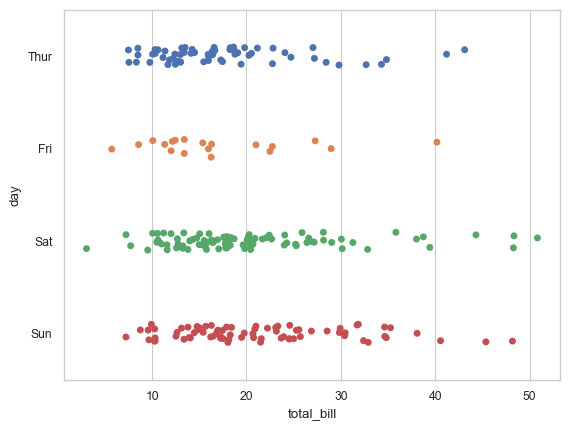

In [221]:
sns.stripplot(data=tips, x = 'total_bill', y= 'day')

- x 축에 카테고리 타입을 y축에 숫자 타입 데이터를 설정하면 vertical한 모양의 그래프를 그릴 수 있다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

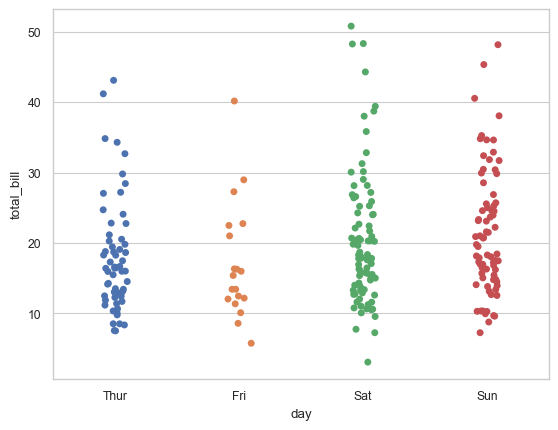

In [222]:
sns.stripplot(data=tips, x = 'day', y= 'total_bill')

- hue 키워드 인수를 추가해서 변량을 하나 더 추가할 수 있다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

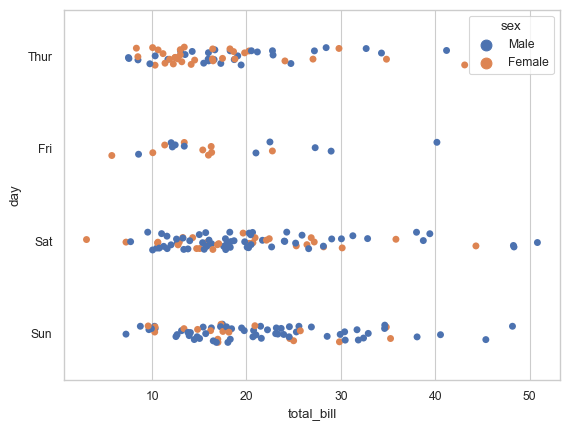

In [223]:
sns.stripplot(data=tips, x = 'total_bill', y= 'day',hue = 'sex')

- 앞의 예시는 hue 키워드에 카테고리 column을 지정했는데, 이산형 숫자 타입의 데이터를 갖는 column도 지정할 수 있다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

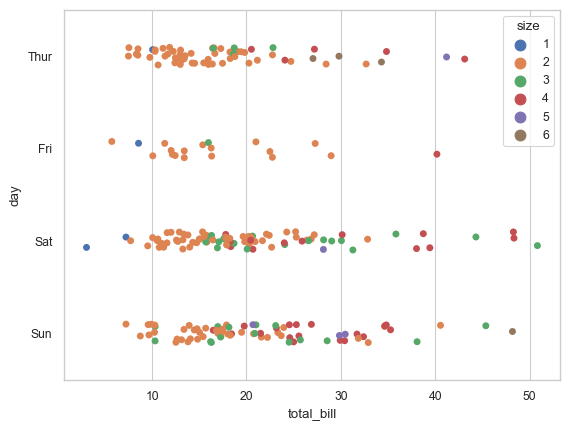

In [224]:
sns.stripplot(data=tips, x = 'total_bill', y= 'day',hue = 'size')

- dodge = True 키워드 인수를 통해 hue로 나눈 카테고리 값을 완전히 분리시킬 수 있다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

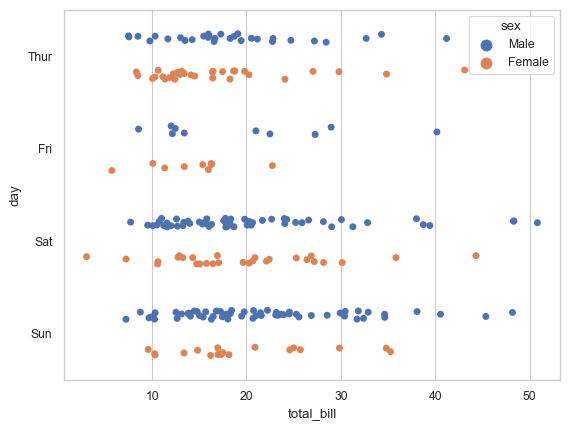

In [225]:
sns.stripplot(data=tips, x = 'total_bill', y= 'day',hue = 'sex',dodge = True)

# swarmplot()
- strip plot()과 매우 흡사하다.
- 하지만 데이터를 마커로 표현할 때 절대로 겹치지 않게끔 표현한다는 차이점이 있다.
- 정확한 데이터 분포를 표현하기에 적합하나 아주 큰 스케일의 데이터를 표현하기엔 필요 너비가 너무 넓어져 적합하지 않게된다.

<AxesSubplot:xlabel='total_bill'>

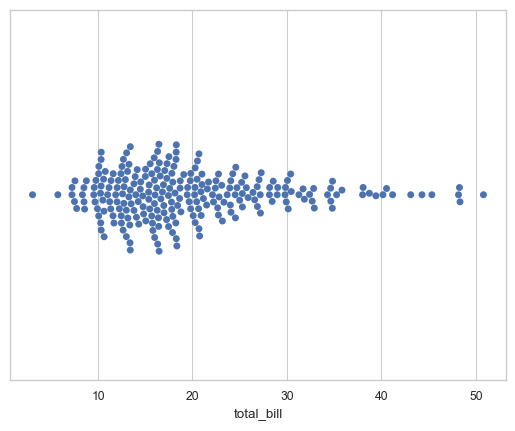

In [226]:
sns.swarmplot(data = tips , x = 'total_bill')

- y값에 카테고리 자료형을 갖는 column을 추가함으로써 각 카테고리마다의 swarm plot으로 쪼갠 예제

<AxesSubplot:xlabel='total_bill', ylabel='day'>

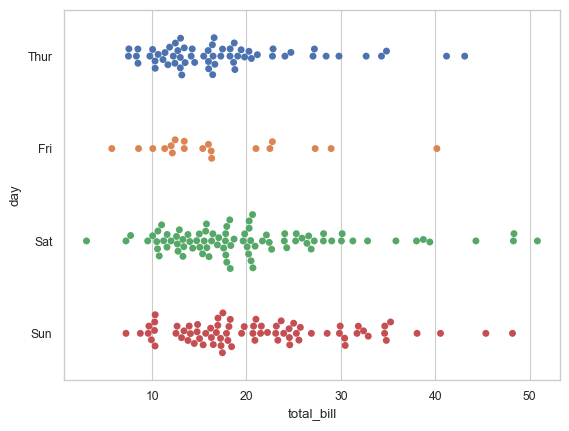

In [227]:
sns.swarmplot(data = tips, x = 'total_bill', y = 'day')

- swarm plot을 vertical 방향으로 표현하려면 x 값에 카테고리 자료형을 y 값에 숫자형 데이터를 설정해 주면 된다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

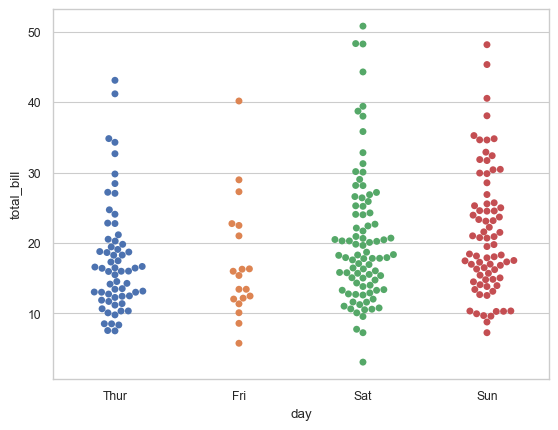

In [228]:
sns.swarmplot(data = tips , x = 'day', y= 'total_bill')

- hue 키워드 인수를 추가하여 변량을 하나 더 추가하여 그래프를 세분화 한다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

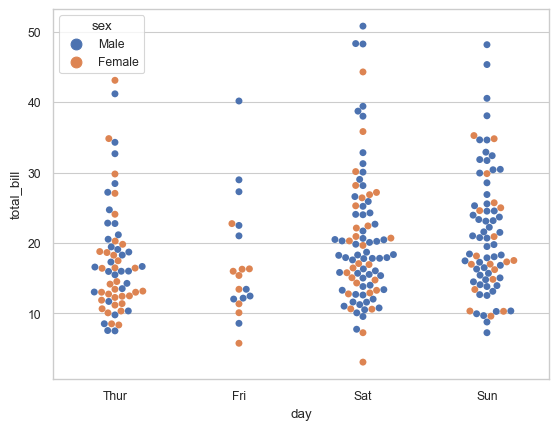

In [229]:
sns.swarmplot(data = tips , x = 'day', y= 'total_bill',hue = 'sex')

- dodge = True 키워드 인수를 통해 hue로 나눈 카테고리 값을 완전피 분리시킬 수 있다.

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

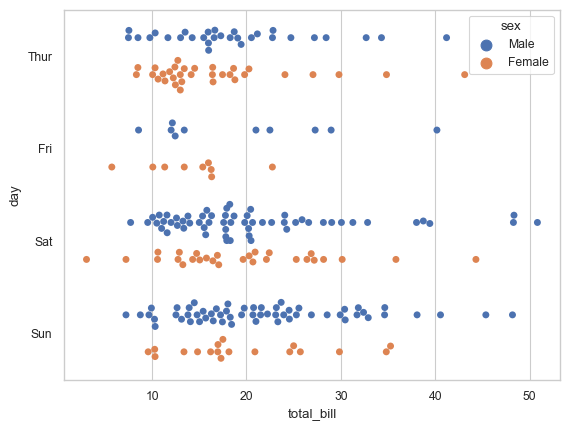

In [230]:
sns.swarmplot(data = tips , x = 'total_bill', y= 'day',hue = 'sex',dodge= True)
# 발생하는 오류는 그래프의 표시범위를 넘어간 값이 존재해서 6.8%가 소실되었다는 메시지이다.

- marker와 linewidth 키워드 인수를 작성하여 시각적 효과를 커스텀하게 적용시킬 수 있다.

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1378: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(swarm_data, cat_pos, s=s, **kws)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

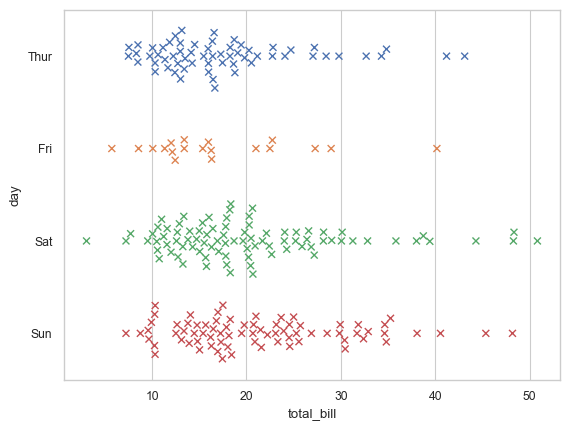

In [231]:
sns.swarmplot(
    data = tips , x = 'total_bill' , y = 'day',
    marker = 'x' , linewidth = 1
)

# catplot()
- categorical plot 인 catplot은 axes-level(row, col)까지 분류를 나눌 수 있습니다.
- catplot은 카테고리화를 더 세분화해서 작업할 수 있는 플롯이다.
- kind 키워드 인수를 사용하면 axes-level에 사용할 그래프의 유형을 선택할 수 있다.
- kind 키워드를 선택하지 않으면 jittered strip plot의 결과를 얻을 수 있다.

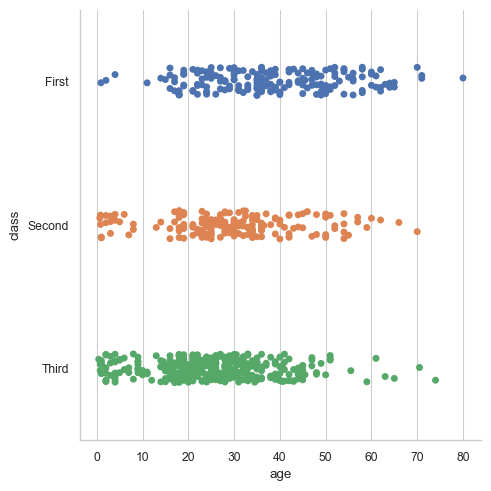

In [232]:
sns.catplot(data = df , x = 'age', y = 'class')

- kind 키워드 인수에 box라는 문자열을 전달하면 결과물을 box plot으로 표현해준다.

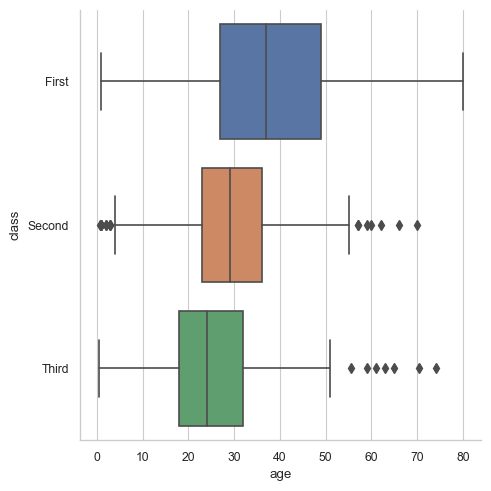

In [233]:
sns.catplot(data = df , x = 'age', y = 'class',kind = 'box')

- kind를 violin으로 하면 커널 밀도의 히스토그램을 그려준다.

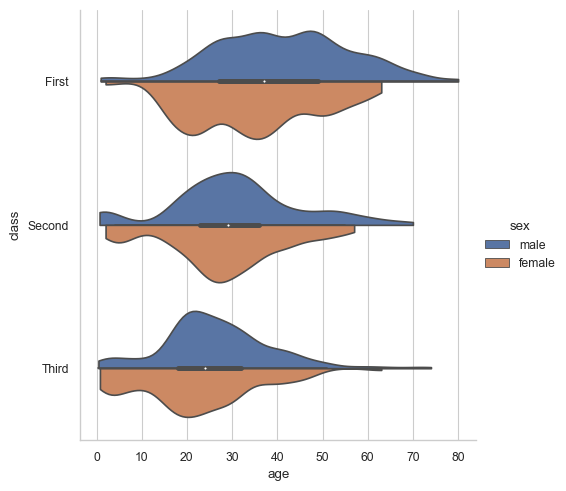

In [234]:
sns.catplot(data = df , x = 'age', y = 'class',hue = 'sex', kind = 'violin', bw = .25, cut = 0 , split = True ) # split을 쓰려면 hue값이 2개만 있어야함.
# violin의 특징을 갖는 키워드 인수를 넣을 수 있더라.

- kind를 bar plot으로 한 예제
- axes가 2개인 것처럼 표현되었다.
- col 키워드 인수에 'sex' column을 사용했기에 그래프를 각각 분리시켜 보여주는 bar plot의 특징을 보인다.

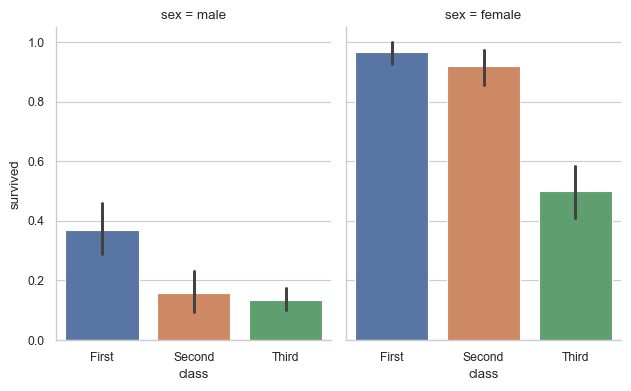

In [235]:
sns.catplot(data = df , x = 'class', y = 'survived',col = 'sex', kind = 'bar', height = 4, aspect = .8)

### 연속해서 그래프를 그리는 메서드를 여러 차례 사용할 수 있다.
- 이러한 경우 해당하는 그래프 레이어가 겹쳐서 보이게 된다.

<AxesSubplot:xlabel='age', ylabel='class'>

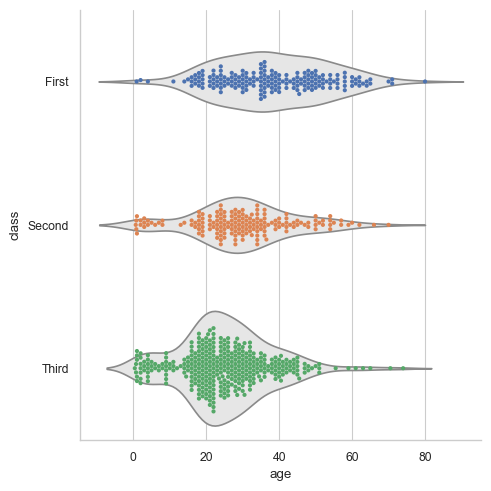

In [236]:
sns.catplot(data = df, x = 'age', y = 'class', kind = 'violin', color = '.9',scale = 'count', inner = None)
sns.swarmplot(data = df , x = 'age', y = 'class', size = 3)

### jointplot()
- 두 개의 변수의 분포를 나타낼 때 활용하면 좋은 플롯
- histogram 과 scater plot을 동시에 사용해서 시각적 효과를 표현함
- 보기에는 직관적으로 볼 수 있지만 어떤 특징을 찾기는 어렵다.(얻을 수 있는 정보가 없다)

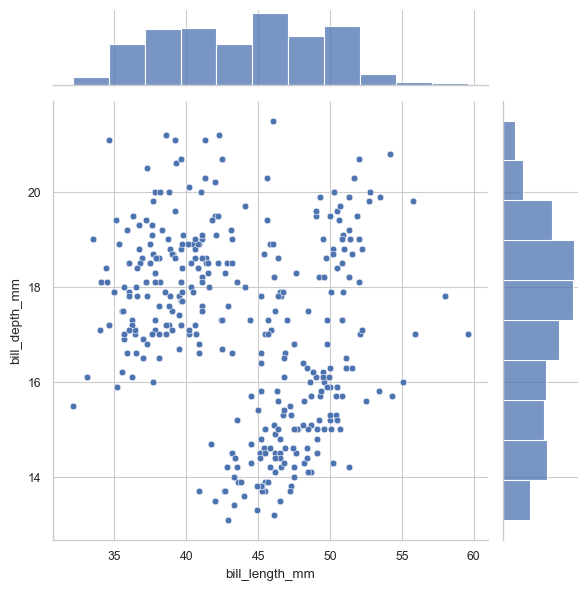

In [237]:
sns.jointplot(data = penguins , x   = 'bill_length_mm', y = 'bill_depth_mm')

- hue 키워드 인수를 사용하여 히스토그램으로 표현된 분포가 자동적으로 kde로 변경된 것을 확인할 수 있다.
- 종에 따른 분포가 더 시작적으로 잘 보이게 되었다.

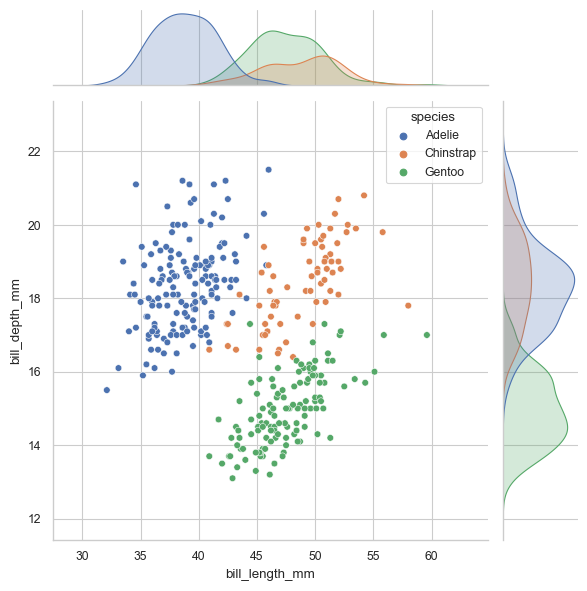

In [238]:
sns.jointplot(data = penguins , x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

- kind를 사용하여 main 그래프의 종류를 scatter에서 다른 그래프로 바꿀 수 있다.

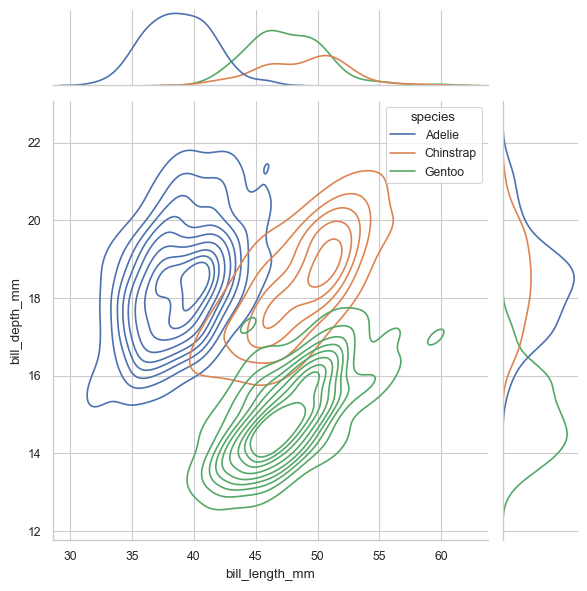

In [239]:
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', kind = 'kde')

- kind 키워드 인수에 reg 값을 전달해서 선형 회귀에 대한 결과를 그래프로 볼 수 있다.
- hue 와 kind = 'reg는 동시에 사용될 수 없다.

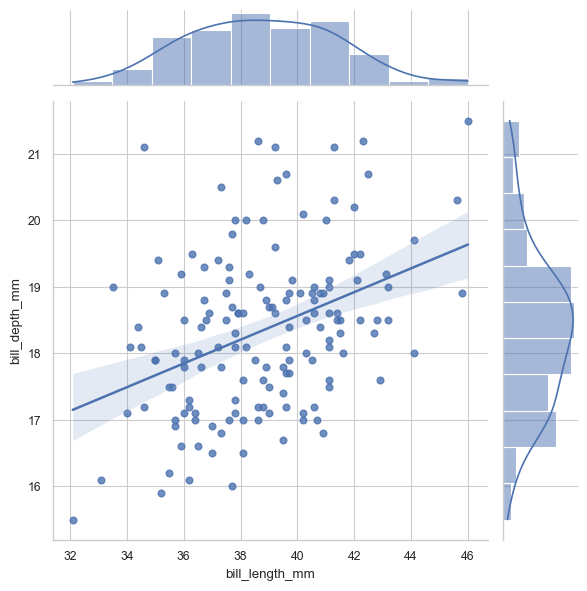

In [240]:
adelie_penguins = penguins[penguins['species'] == 'Adelie']
sns.jointplot(data = adelie_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', kind = 'reg')

- height(크기), ratio(main과 marginal 그래프 간의 비율), marginal_ticks(marginal histogram에 ticks를 표현할지) 키워드 인수를 사용하여 추가가 가능하다.

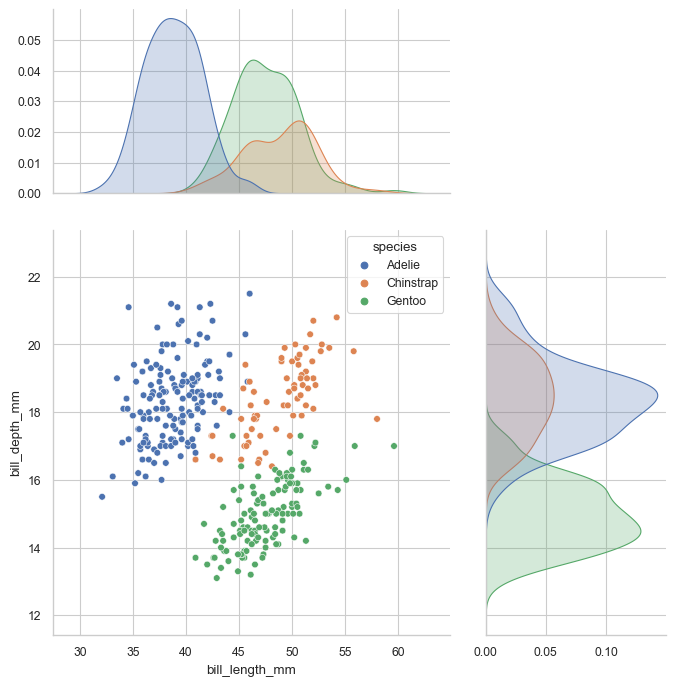

In [241]:
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', height = 7, ratio = 2 , marginal_ticks = True)

# pair plot()
- 데이터셋 내의 각 column마다 pair로 경우에 수에 따라 묶고 그에 따른 결과를 일목요연하게 한번에 확인할 수 있는 플롯이다.
- 아래 예시의 경우 float형 Dtype을 가지는 모든 column들의 서로간의 관계를 모두 보여준다.
- 자기 자신과 매치되는 경우에는 histogram으로 값의 분포를 보여준다
- 마찬가지로 hue 키워드를 사용할 수 있고, marginal plot의 형태가 kde로 변경됨을 볼 수 있다.

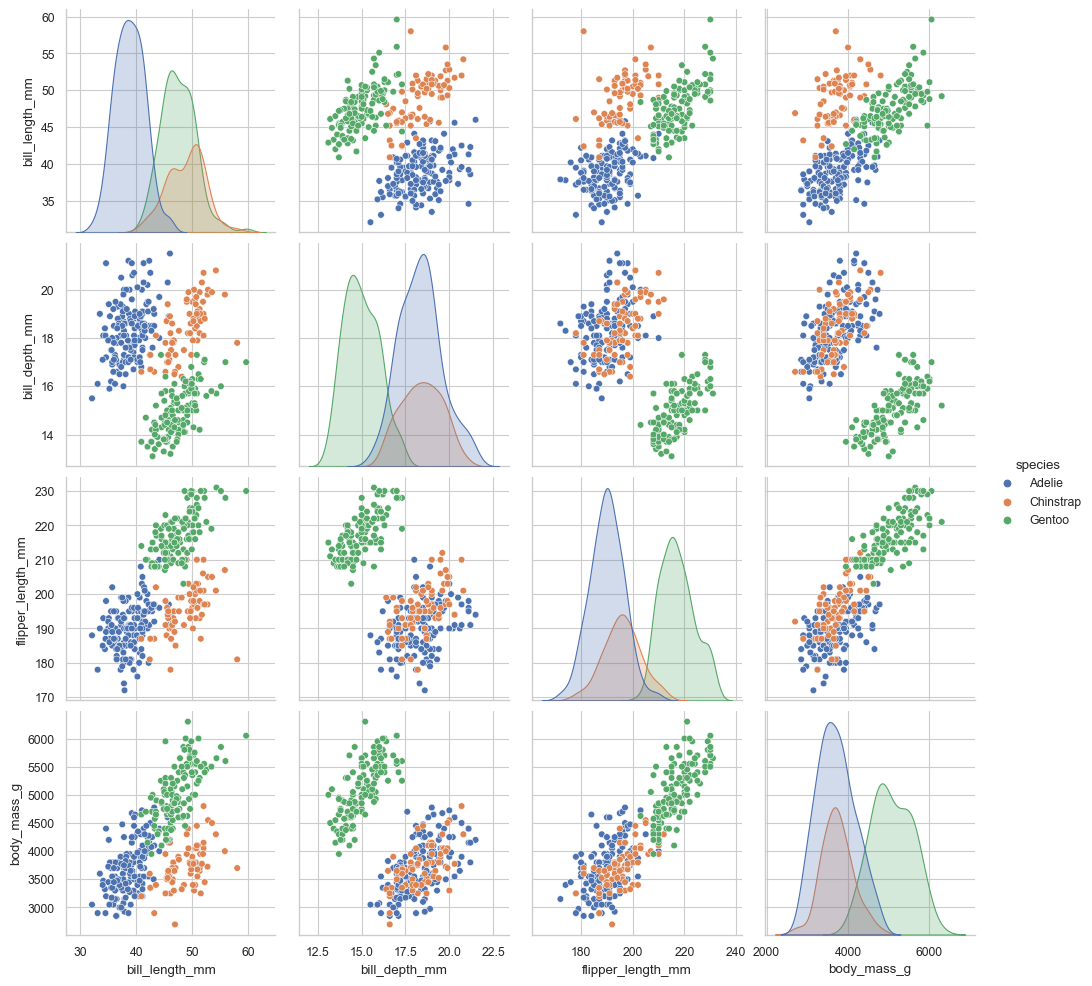

In [242]:
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins,hue = 'species')

- marginal plot이 kde가 아닌 histogram으로 표현하도록 변경이 가능하다
- diag_kind 키워드 인수를 사용하면된다.

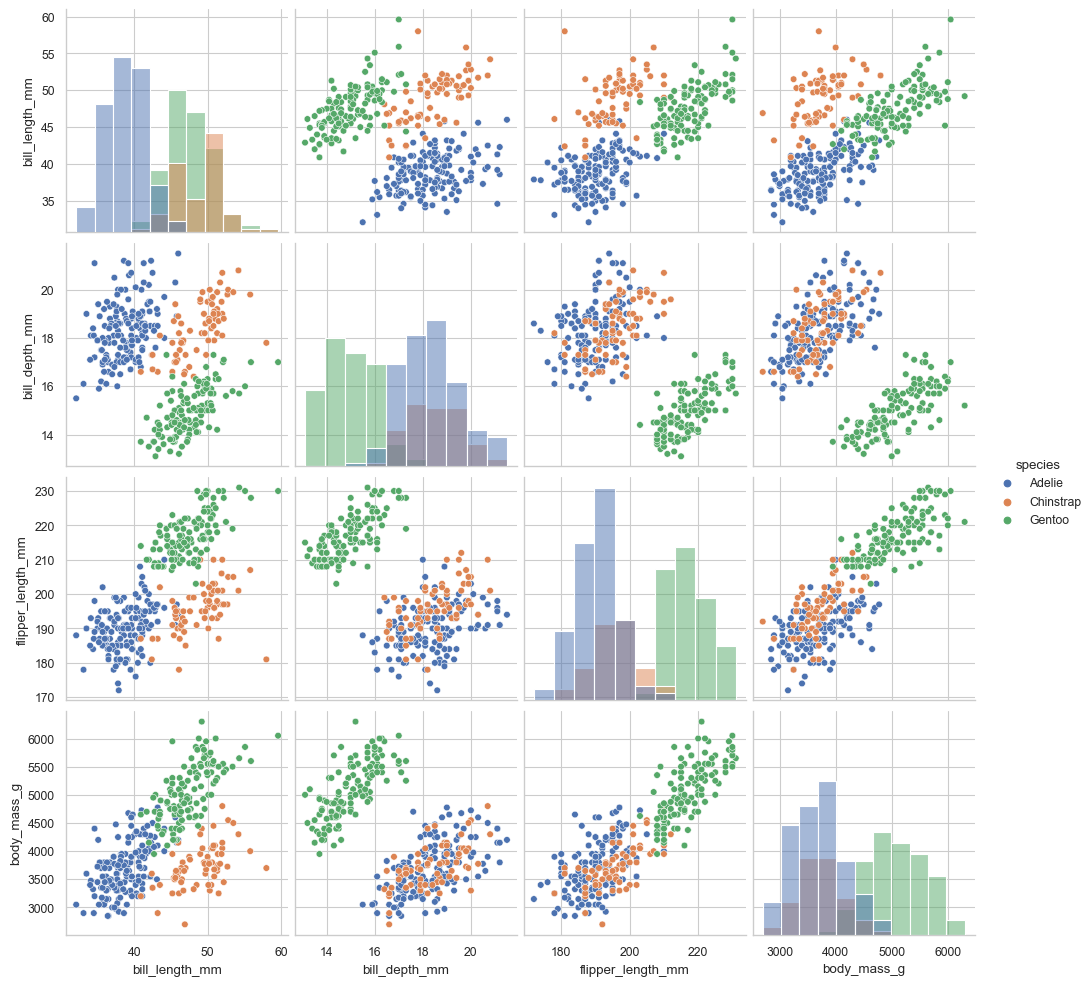

In [243]:
sns.pairplot(penguins,hue = 'species', diag_kind = 'hist')

- main graph에 대한 종류르 바꾸기 위해선 kind 키워드 인수에 값을 전달하면 된다.

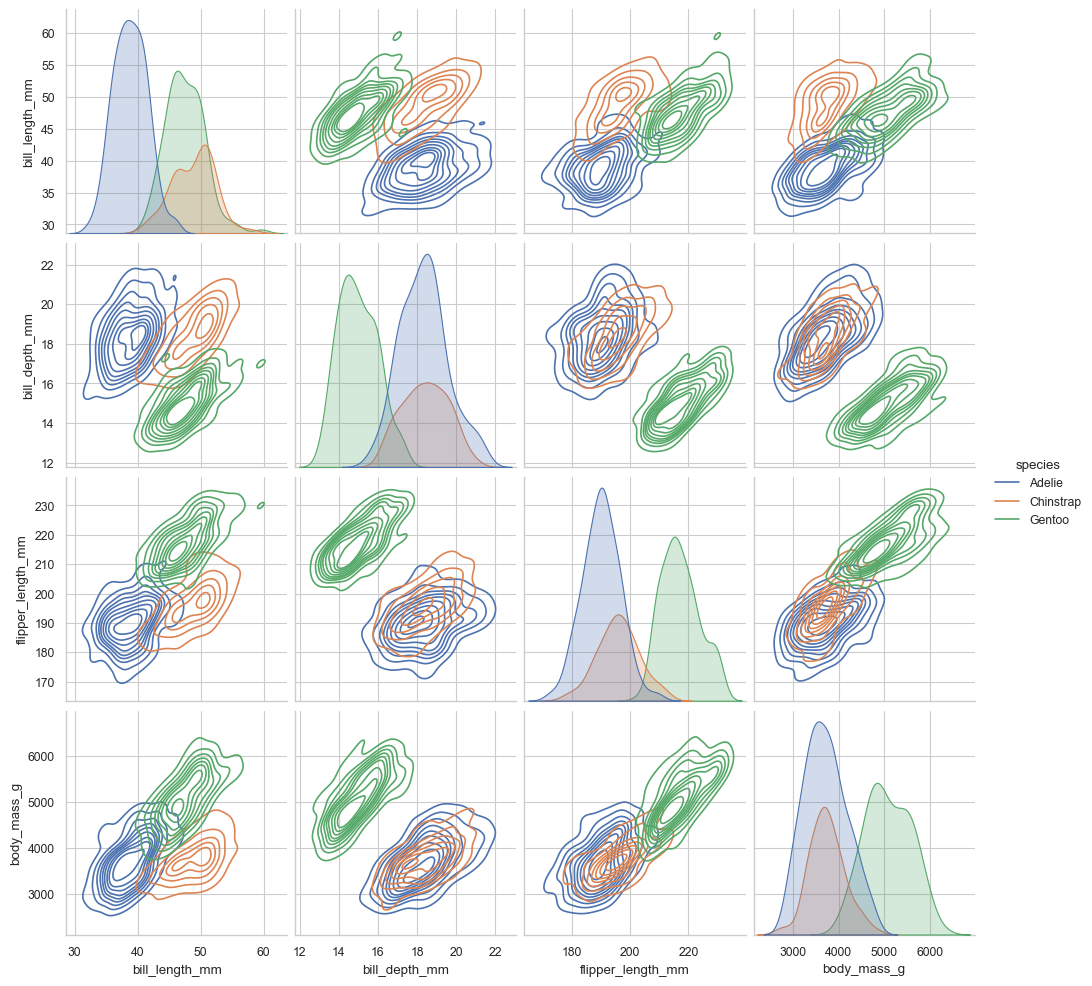

In [244]:
sns.pairplot(penguins , hue = 'species', kind = 'kde')

- 원하는 column 만 추려서 비교하도록 지정할 수 있다.
- x_vars , y_vars 키워드 인수를 활용한다.

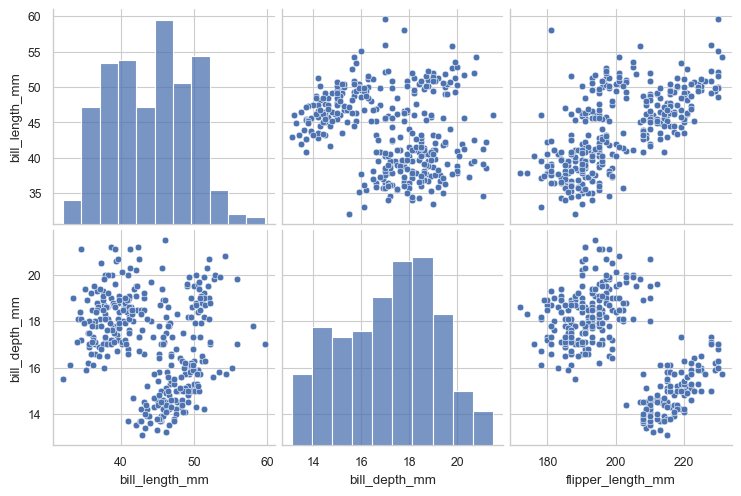

In [245]:
sns.pairplot(
    penguins,
    x_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
    y_vars = ['bill_length_mm', 'bill_depth_mm']
)

### 같은 축이라서 발생하는 중복되는 부분에 대한 처리
- 한 방향으로만 그 분포를 얻으면 되겠다 싶은 경우 corner 키워드 인수 = True 를 해주면 된다.

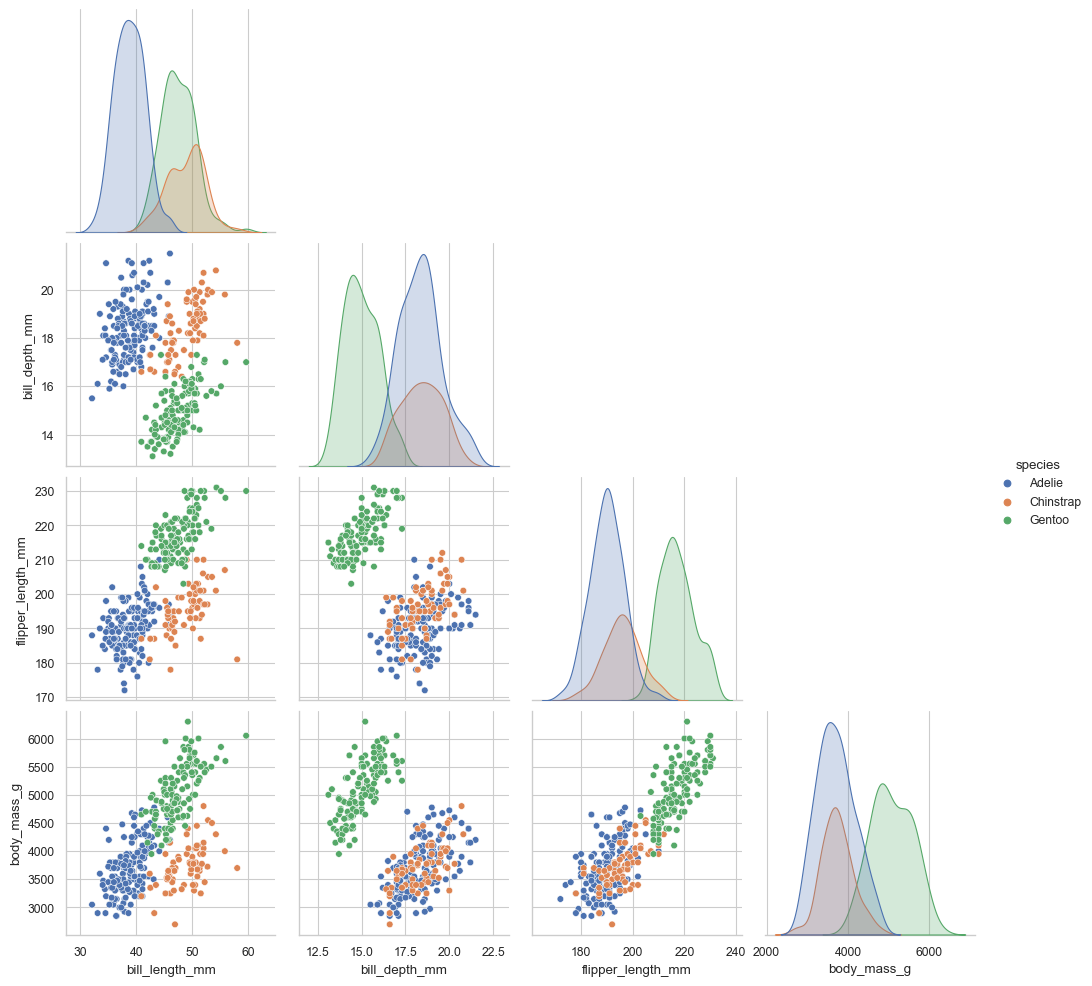

In [246]:
sns.pairplot(penguins, hue = 'species', corner=  True)

# pandas pivot table
- pivot table 이란 데이터 column 중에서 두 개의 column을 각각 row인덱스, column인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것을 말한다.
- row 인덱스, column 인덱스 로 조회한 값이 data column안에 주어진 데이터가 존재하지 않으면 NaN처리한다.
### pandas.pivot_table() 메서드를 사용한다.
- 첫번째 인수 = DataFrame
- 두번째 인수 = 데이터로 사용할 column이름
- 세번째 인수 = row 인덱스로 사용할 column 이름
- 네번째 인수 = column 인덱스로 사용할 column name을 넣는다.
- aggfunc 은 기본적으로 평균 값을 구하도록 default 세팅이 되어있다.
### pandas.DataFrame.pivot_table
- 첫번째 인수로 data를 넘겨주는게 아니라 해당 DataFrame에 메서드를 적용하는 방식의 차이일뿐이다.

In [247]:
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic.pivot_table( 'survived',index = 'class',columns = 'who') # aggfunc 키워드 인수를 따로 지정하지 않았기에 평균을 출력한다.

who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228

In [248]:
# agg func 를 sum으로 바꾸어서 출력결과가 달라졌다.
import numpy as np
titanic.pivot_table( 'survived',index = 'class',columns = 'who',aggfunc = np.sum)

who     child  man  woman
class                    
First       5   42     89
Second     19    8     60
Third      25   38     56

- 해당하는 값이 없다면 NaN으로 표현된다.
- NaN값은 pivot_table() 메서드 인자 중 fill_value에 값을 전달하면 해당 값으로 NaN이 처리된다.

In [249]:
pd.pivot_table(titanic, values = 'survived', index = 'class', columns = 'deck', aggfunc = np.mean)

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72    NaN  NaN
Second       NaN       NaN      NaN  0.750000  0.75  0.875  NaN
Third        NaN       NaN      NaN       NaN  1.00  0.200  0.5

In [250]:
pd.pivot_table(titanic, values = 'survived', index = 'class', columns = 'deck', aggfunc = np.mean, fill_value = 0) 

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72  0.000  0.0
Second  0.000000  0.000000  0.00000  0.750000  0.75  0.875  0.0
Third   0.000000  0.000000  0.00000  0.000000  1.00  0.200  0.5

### heatmap()
- 데이터셋 중 비교하고자 하는 column의 pair가 모두 카테고리 값이거나,
- 피봇테이블의 결과를 가지고 heatmap() 표현하면 각  column간의 상관 관계를 색상의 짙고 옅음으로 표현할 수 있다.

<AxesSubplot:xlabel='who', ylabel='class'>

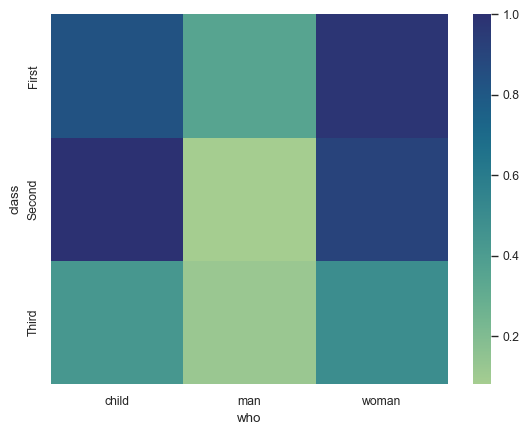

In [251]:
ttn_cls_who = pd.pivot_table(titanic,'survived',index = 'class', columns = 'who')
sns.heatmap(ttn_cls_who, cmap = 'crest') # cmap = colormap # 색이 짙은 푸른색일수록 생존율이 높고 노란빛에 가까울수록 생존율이 낮다.

- annot 키워드 인수에 True 값을 주면 각 cell 마다 value를 표기할 수 있다.
- fmt 키워드 인수를 사용하여 cell 마다 표기한 value의 포맷을 지정해준다.
- linewidth를 명시하여 cell간의 구분을 더 명확하게 지정한다. - 여기선 0.5 인치 두께의 선으로 cell간 구분해줌

<AxesSubplot:xlabel='who', ylabel='class'>

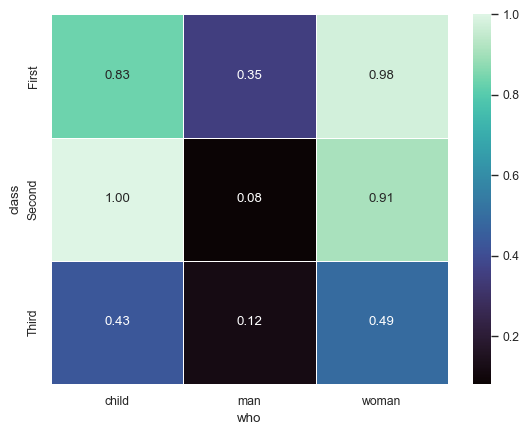

In [252]:
sns.heatmap(ttn_cls_who, cmap = 'mako', annot = True , fmt = '3.2f', linewidth = .5)

### seaborn 에서 지원하는 dataset중 하나를 선택해서 각자 원하는 결과를 도출해보기
- 나의 주제 : 펭귄은 대부분의 경우 부리의 길이와 두께를 통해 암수구분이 가능하다고 한다.
- 암수 구분 + 종별 구분한 부리의 길이, 두께 정보를 여러 방식을 사용하여 시각화해보자

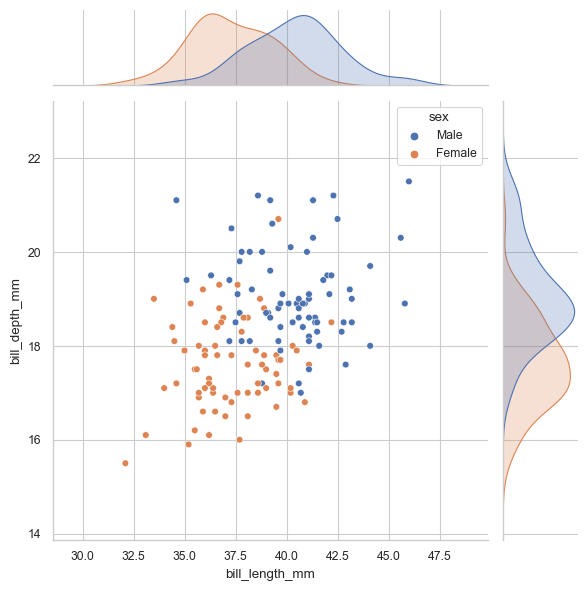

In [277]:
#1번 방식
import seaborn as sns
peng = sns.load_dataset('penguins')
Adelie = peng[peng['species'] == 'Adelie']
sns.jointplot(data = Adelie, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'sex')

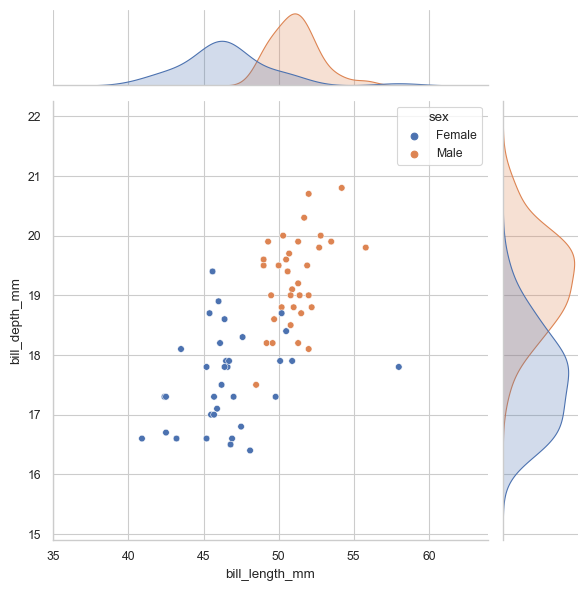

In [254]:
Chinstrap = peng[peng['species'] == 'Chinstrap']
sns.jointplot(data = Chinstrap, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'sex')

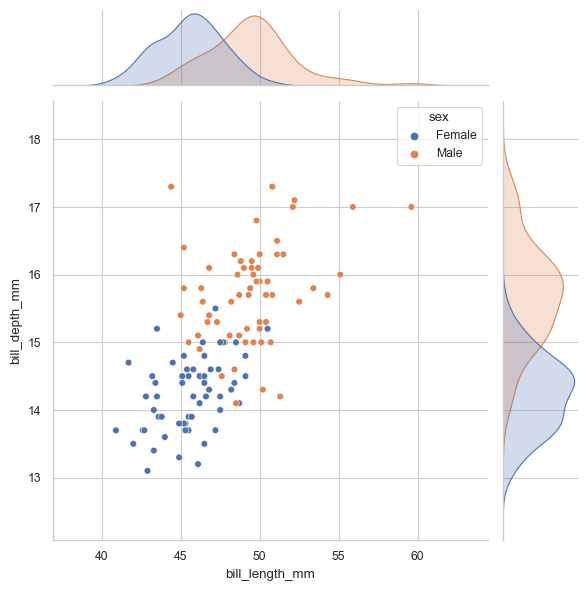

In [282]:
Gentoo = peng[peng['species'] == 'Gentoo']
sns.jointplot(data = Gentoo, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'sex')

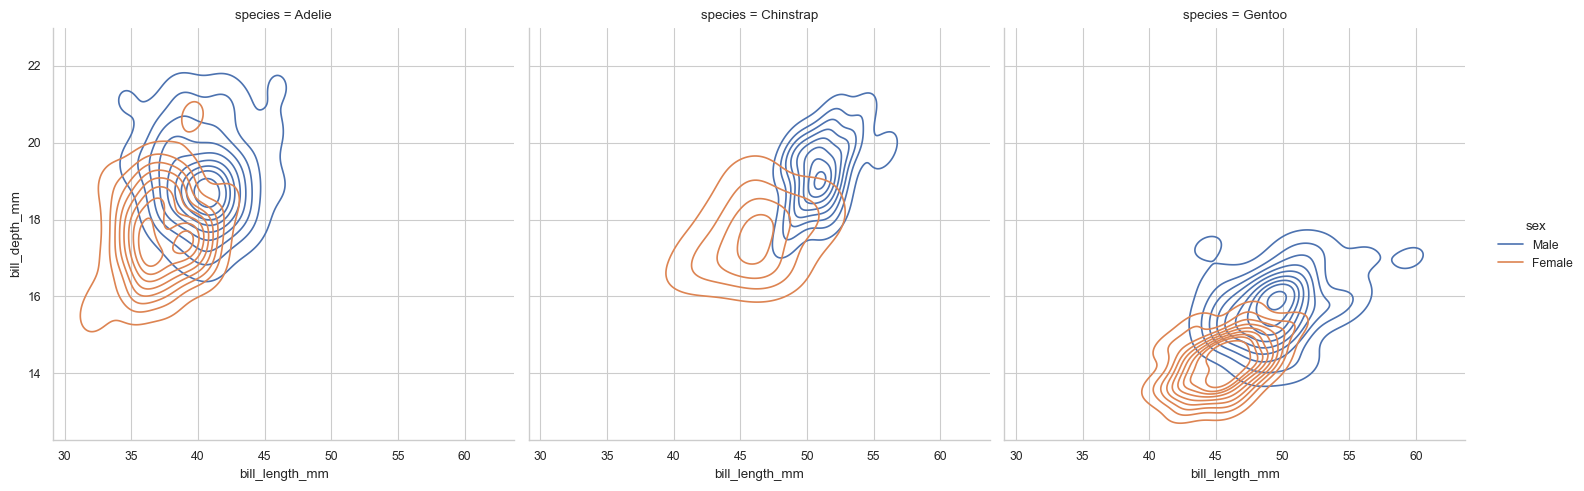

In [261]:
# 2번방식
sns.displot(data = penguins, x = 'bill_length_mm',y = 'bill_depth_mm', hue = 'sex', col = 'species', kind= 'kde')